# 第二步 数据分析和可视化

## 熊猫数据分析：中级

### NumPy入门

##### NumPy是一个将Python的灵活性和易用性与C的速度相结合的库

#### 创建数组 array

##### 一维阵列通常被称为矢量，而二维阵列通常被称为矩阵。这两个术语都来自一个叫做线性代数的数学分支。它们也经常用在数据科学文献中，所以我们将在整个课程中使用这些词汇。

In [102]:
import numpy as np
list_1 = [10, 20, 30]
vector = np.array(list_1)
list_2 = [[5, 10, 15], [20, 25, 30], [35, 40, 45]]
matrix = np.array(list_2)
print(vector)
print(matrix,matrix.shape)

[10 20 30]
[[ 5 10 15]
 [20 25 30]
 [35 40 45]] (3, 3)


#### 读取数据 genfromtxt

In [103]:
import numpy
world_alcohol = numpy.genfromtxt(r"world_alcohol.csv", delimiter=",")
print(type(world_alcohol))
world_alcohol[:5]

<class 'numpy.ndarray'>


array([[             nan,              nan,              nan,
                     nan,              nan],
       [  1.98600000e+03,              nan,              nan,
                     nan,   0.00000000e+00],
       [  1.98600000e+03,              nan,              nan,
                     nan,   5.00000000e-01],
       [  1.98500000e+03,              nan,              nan,
                     nan,   1.62000000e+00],
       [  1.98600000e+03,              nan,              nan,
                     nan,   4.27000000e+00]])

#### 数据类型

![title](图片/数据类型.png)

#### 正确读取数据

In [104]:
import numpy as np
world_alcohol = np.genfromtxt(r"world_alcohol.csv", delimiter=",", dtype="U75", skip_header=1)
print(world_alcohol)

[['1986' 'Western Pacific' 'Viet Nam' 'Wine' '0']
 ['1986' 'Americas' 'Uruguay' 'Other' '0.5']
 ['1985' 'Africa' "Cte d'Ivoire" 'Wine' '1.62']
 ..., 
 ['1986' 'Europe' 'Switzerland' 'Spirits' '2.54']
 ['1987' 'Western Pacific' 'Papua New Guinea' 'Other' '0']
 ['1986' 'Africa' 'Swaziland' 'Other' '5.15']]


#### 索引数组

In [105]:
world_alcohol[1][4]
world_alcohol[:,2:4]

array([['Viet Nam', 'Wine'],
       ['Uruguay', 'Other'],
       ["Cte d'Ivoire", 'Wine'],
       ..., 
       ['Switzerland', 'Spirits'],
       ['Papua New Guinea', 'Other'],
       ['Swaziland', 'Other']],
      dtype='<U75')

### 用NumPy进行计算

#### 数组比较

In [106]:
world_alcohol[:,2]=="Canada"

array([False, False, False, ..., False, False, False], dtype=bool)

In [107]:
country_is_algeria = world_alcohol[:,2] == "Algeria"
country_algeria = world_alcohol[country_is_algeria,:]
print(country_algeria)

[['1984' 'Africa' 'Algeria' 'Spirits' '0.01']
 ['1987' 'Africa' 'Algeria' 'Beer' '0.17']
 ['1987' 'Africa' 'Algeria' 'Spirits' '0.01']
 ['1986' 'Africa' 'Algeria' 'Wine' '0.1']
 ['1984' 'Africa' 'Algeria' 'Other' '0']
 ['1989' 'Africa' 'Algeria' 'Beer' '0.16']
 ['1989' 'Africa' 'Algeria' 'Spirits' '0.01']
 ['1989' 'Africa' 'Algeria' 'Wine' '0.23']
 ['1986' 'Africa' 'Algeria' 'Spirits' '0.01']
 ['1984' 'Africa' 'Algeria' 'Wine' '0.12']
 ['1985' 'Africa' 'Algeria' 'Beer' '0.19']
 ['1985' 'Africa' 'Algeria' 'Other' '0']
 ['1986' 'Africa' 'Algeria' 'Beer' '0.18']
 ['1985' 'Africa' 'Algeria' 'Wine' '0.11']
 ['1986' 'Africa' 'Algeria' 'Other' '0']
 ['1989' 'Africa' 'Algeria' 'Other' '0']
 ['1987' 'Africa' 'Algeria' 'Other' '0']
 ['1984' 'Africa' 'Algeria' 'Beer' '0.2']
 ['1985' 'Africa' 'Algeria' 'Spirits' '0.01']
 ['1987' 'Africa' 'Algeria' 'Wine' '0.1']]


#### 多条件比较

In [108]:
year_is_1986 = world_alcohol[:, 0] == '1986'
country_is_Algeria = world_alcohol[:, 2] == 'Algeria'
is_algeria_and_1986 = year_is_1986 & country_is_Algeria
rows_with_algeria_and_1986 = world_alcohol[is_algeria_and_1986, :]
rows_with_algeria_and_1986


array([['1986', 'Africa', 'Algeria', 'Wine', '0.1'],
       ['1986', 'Africa', 'Algeria', 'Spirits', '0.01'],
       ['1986', 'Africa', 'Algeria', 'Beer', '0.18'],
       ['1986', 'Africa', 'Algeria', 'Other', '0']],
      dtype='<U75')

#### 替换值

In [109]:
world_alcohol[:,0][world_alcohol[:,0] == '1986'] = '2014'
world_alcohol[:,3][world_alcohol[:,3] == 'Wine'] = 'Grog'
is_value_empty = world_alcohol[:, 4]==''
world_alcohol[:, 4][is_value_empty] = 0

#### 改类型

In [110]:
alcohol_consumption = world_alcohol[:, 4]
alcohol_consumption = alcohol_consumption.astype(float)

#### 计算

In [111]:
total_alcohol = alcohol_consumption.sum()
average_alcohol = alcohol_consumption.mean()

In [112]:
world_alcohol[(world_alcohol[:, 2] == 'Canada') &(  world_alcohol[:, 0] == '1986')  &(  world_alcohol[:, 4] != ''),:]

array([], shape=(0, 5),
      dtype='<U75')

### 熊猫介绍

### 处理丢失的数据

### 挑战：总结数据

### 熊猫内部：系列

### 熊猫内部：数据框

### 项目：Python和pandas安装

### 项目指导：分析感恩节晚餐

### 发现罪犯模式

## 探索性数据可视化

### 折线图

In [2]:
import pandas as pd
import os
path=r"C:\Users\gaoxiang\Documents\GitHub\django\数据集\unrate.csv"
pwd = os.getcwd()
os.chdir(os.path.dirname(path))
unrate = pd.read_csv(os.path.basename(path))
#os.chdir(pwd)
unrate['DATE'] = pd.to_datetime(unrate['DATE'])
unrate=unrate.set_index("DATE",drop=False)
unrate.head()

,DATE,VALUE
DATE,,
1948-01-01,1948-01-01,3.4
1948-02-01,1948-02-01,3.8
1948-03-01,1948-03-01,4.0
1948-04-01,1948-04-01,3.9
1948-05-01,1948-05-01,3.5


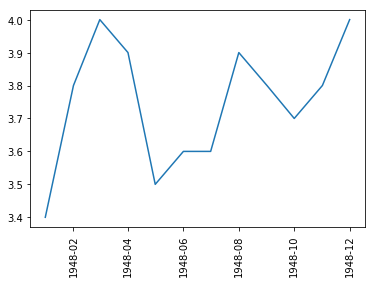

In [114]:
import matplotlib.pyplot as plt
plt.plot(unrate["1948"].index, unrate["1948"]['VALUE'])
plt.xticks(rotation=90)
plt.show()

### 多个地块

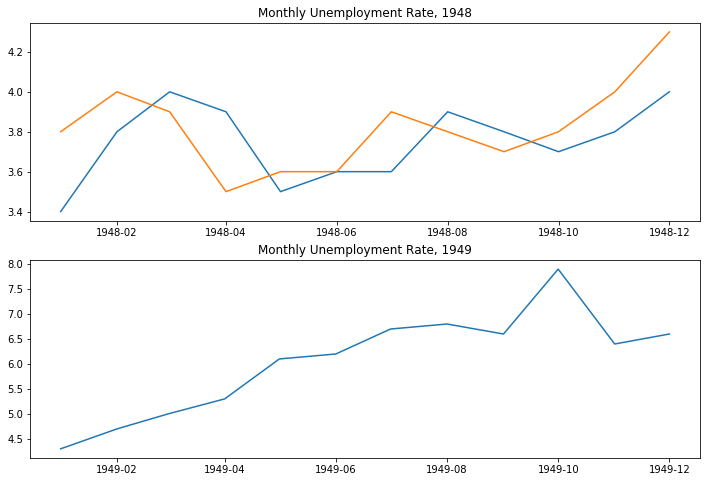

In [115]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax1.plot(unrate[0:12]['DATE'], unrate[1:13]['VALUE'])
ax1.set_title('Monthly Unemployment Rate, 1948')
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
ax2.set_title('Monthly Unemployment Rate, 1949')
plt.show()

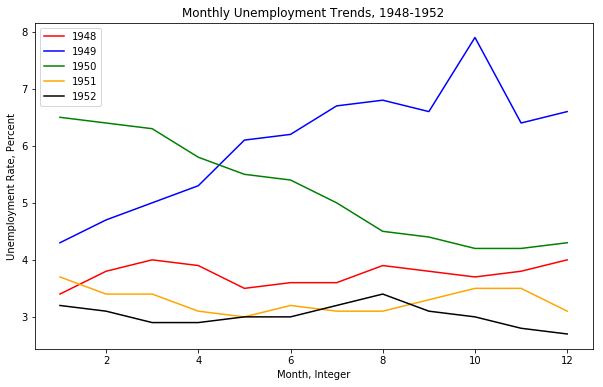

In [116]:
unrate['MONTH'] = unrate.DATE.dt.month
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)
plt.legend(loc='upper left')
plt.xlabel('Month, Integer')
plt.ylabel('Unemployment Rate, Percent')
plt.title('Monthly Unemployment Trends, 1948-1952')

plt.show()

In [117]:
unrate.DATE

DATE
1948-01-01   1948-01-01
1948-02-01   1948-02-01
1948-03-01   1948-03-01
1948-04-01   1948-04-01
1948-05-01   1948-05-01
1948-06-01   1948-06-01
1948-07-01   1948-07-01
1948-08-01   1948-08-01
1948-09-01   1948-09-01
1948-10-01   1948-10-01
1948-11-01   1948-11-01
1948-12-01   1948-12-01
1949-01-01   1949-01-01
1949-02-01   1949-02-01
1949-03-01   1949-03-01
1949-04-01   1949-04-01
1949-05-01   1949-05-01
1949-06-01   1949-06-01
1949-07-01   1949-07-01
1949-08-01   1949-08-01
1949-09-01   1949-09-01
1949-10-01   1949-10-01
1949-11-01   1949-11-01
1949-12-01   1949-12-01
1950-01-01   1950-01-01
1950-02-01   1950-02-01
1950-03-01   1950-03-01
1950-04-01   1950-04-01
1950-05-01   1950-05-01
1950-06-01   1950-06-01
                ...    
2014-03-01   2014-03-01
2014-04-01   2014-04-01
2014-05-01   2014-05-01
2014-06-01   2014-06-01
2014-07-01   2014-07-01
2014-08-01   2014-08-01
2014-09-01   2014-09-01
2014-10-01   2014-10-01
2014-11-01   2014-11-01
2014-12-01   2014-12-01
2015-01-01 

### 条形图和散点图

In [118]:
import pandas as pd
reviews = pd.read_csv('fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
norm_reviews = reviews[cols]
norm_reviews[:1]

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.9,4.5,5.0


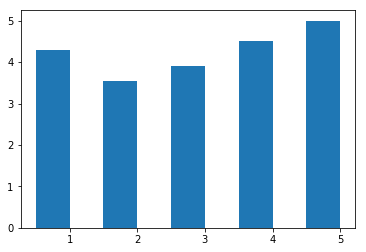

In [119]:
import matplotlib.pyplot as plt
from numpy import arange
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5)
plt.show()

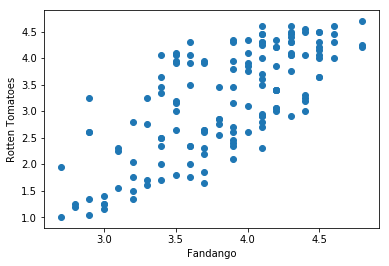

In [120]:
fig, ax = plt.subplots()
ax.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax.set_xlabel('Fandango')
ax.set_ylabel('Rotten Tomatoes')
plt.show()

### 直方图和箱子图

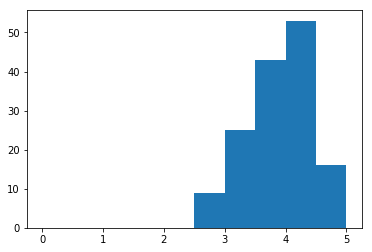

In [121]:
fig, ax = plt.subplots()
ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0, 5))
plt.show()

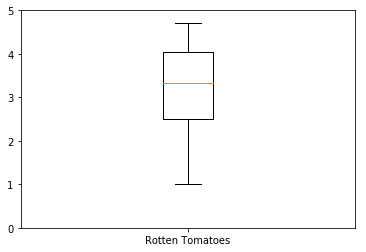

In [122]:
fig, ax = plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_xticklabels(['Rotten Tomatoes'])
ax.set_ylim(0, 5)
plt.show()

### 指导性项目：基于高校专业的收益可视化

In [123]:
import pandas as pd
recent_grads=pd.read_csv(r'recent-grads.csv')
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

In [124]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [125]:
recent_grads=recent_grads.dropna()

Text(0.5,1,'Employed vs. Sample_size')

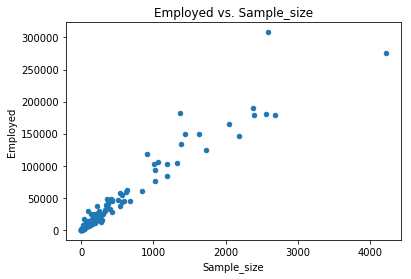

In [126]:
ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
ax.set_title('Employed vs. Sample_size')

c:\users\gaoxiang\envs\test\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0C385EF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0F6028D0>]], dtype=object)

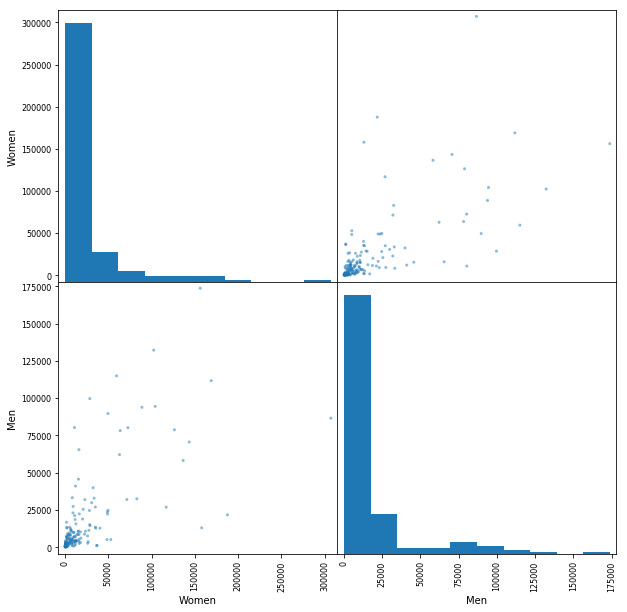

In [127]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10))

## 通过数据可视化讲故事

### 改善情节美学

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

c:\users\gaoxiang\envs\test\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


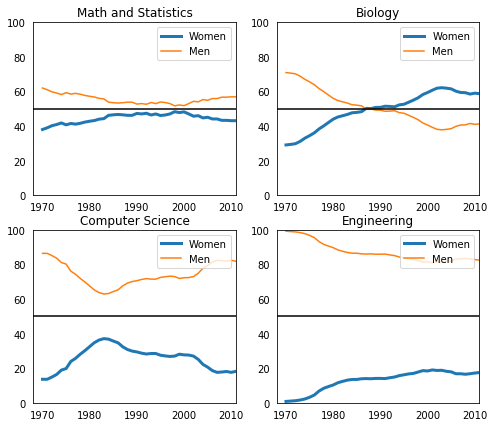

In [129]:
fig = plt.figure(figsize=(8,7))
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
for i in range(len(major_cats)):
    ax1 = fig.add_subplot(2,2,i+1)
    ax1.plot(women_degrees.Year,women_degrees[major_cats[i-1]],label='Women',linewidth=3)
    ax1.plot(women_degrees['Year'], 100-women_degrees[major_cats[i-1]],label='Men')
    ax1.tick_params(bottom="off", top="off", left="off", right="off")
    for key,spine in ax.spines.items():
        spine.set_visible(False)###删除边缘
    ax1.legend()
    plt.legend(loc='upper right')
    plt.title(major_cats[i-1]) 
    ax1.set_xlim(1968, 2011)
    ax1.set_ylim(0,100)
    ax1.axhline(50, c=(0,0,0), alpha=1)
fig.show()

### 颜色，布局，注释

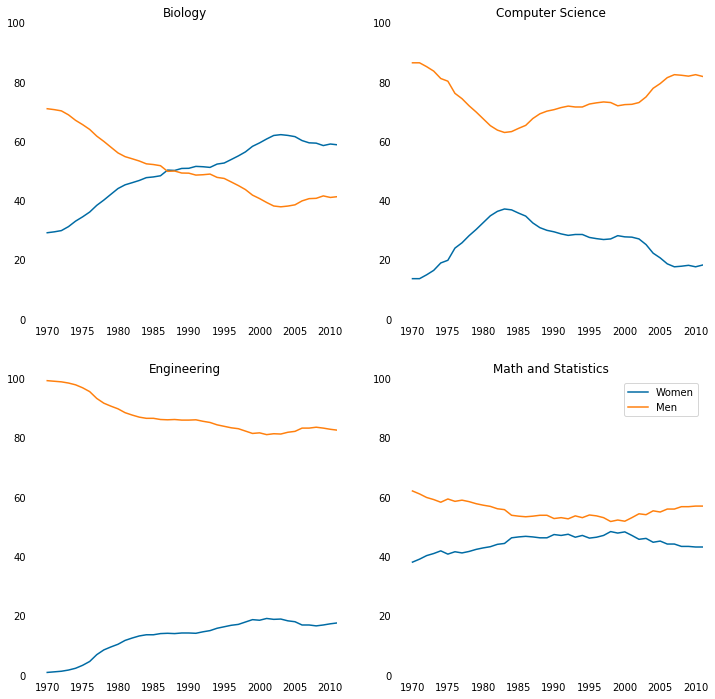

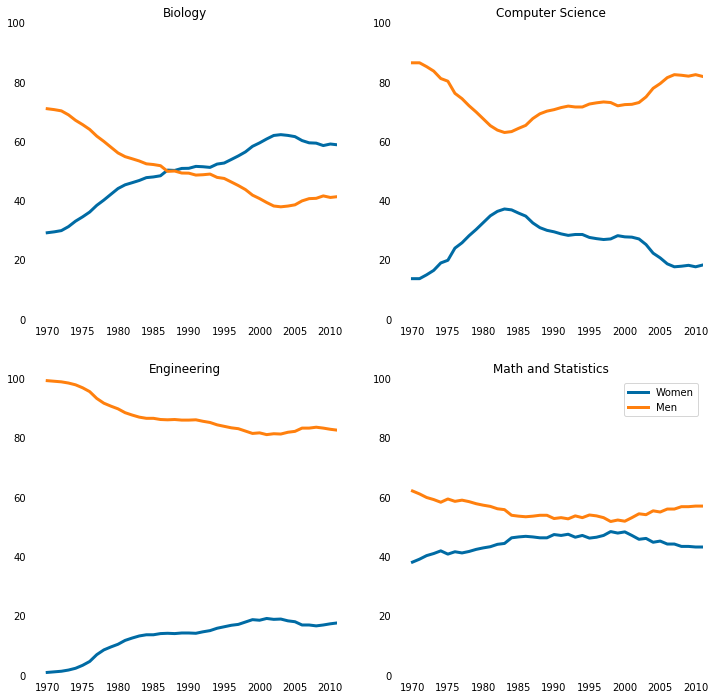

In [130]:
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # Set the line width when specifying how each line should look.
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=cb_orange, label='Men')
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()
cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # Set the line width when specifying how each line should look.
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()

### 指导性项目：大学学位性别差距的可视化

### 有条件的情节

In [131]:
import pandas as pd
titanic = pd.read_csv('train.csv')
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
titanic = titanic[cols].dropna()

In [132]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


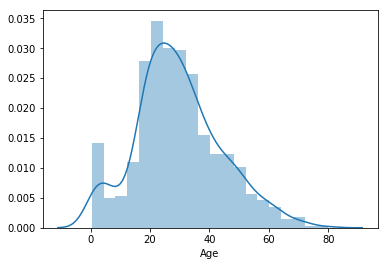

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(titanic['Age'])
plt.show() 

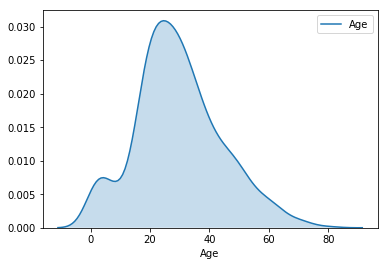

In [134]:
sns.kdeplot(titanic['Age'], shade=True)
plt.xlabel("Age")
plt.show() 

Text(0.5,6.8,'Age')

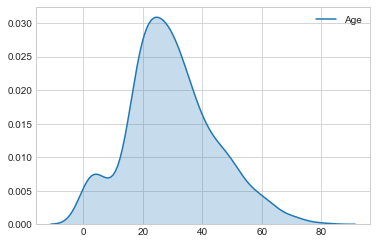

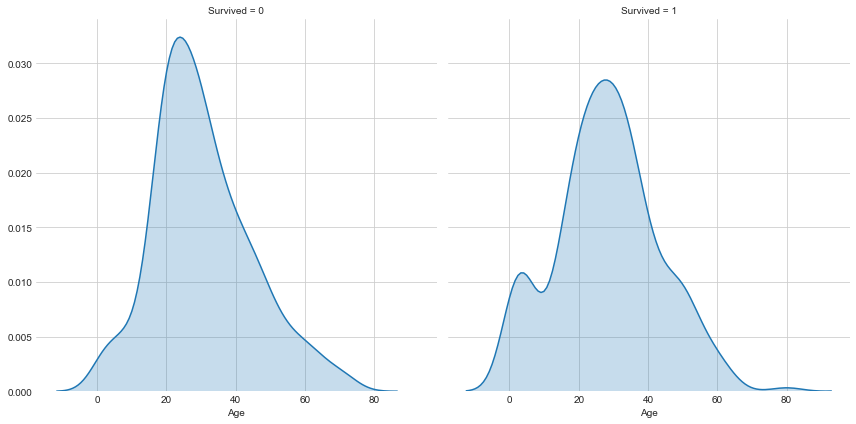

In [135]:
sns.set_style('whitegrid')
sns.kdeplot(titanic['Age'], shade=True)#默认情况下，只有顶部和右侧的轴将被删除# Condition on unique values of the "Survived" column.
g = sns.FacetGrid(titanic, col="Survived", size=6)
# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.xlabel('Age')

* darkgrid：显示坐标网格，深色背景色
* whitegrid：显示坐标网格，白色背景颜色
* dark：坐标网格隐藏，深色背景色
* white：坐标网格隐藏，白色背景颜色
* ticks：坐标网格隐藏，白色背景颜色，蜱可见

 ![title](图片/seaborn_all_styles.png)

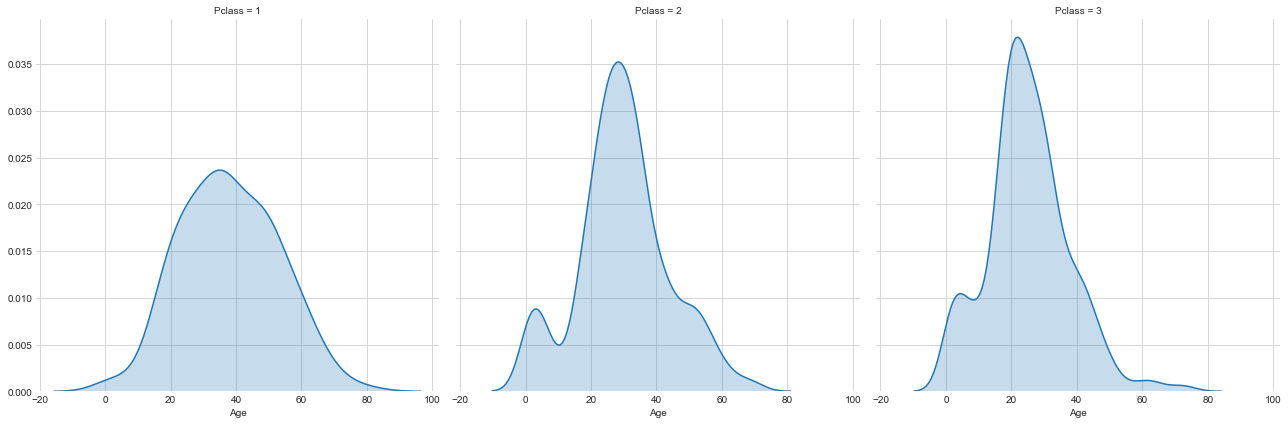

In [136]:
g = sns.FacetGrid(titanic, col="Pclass", size=6)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

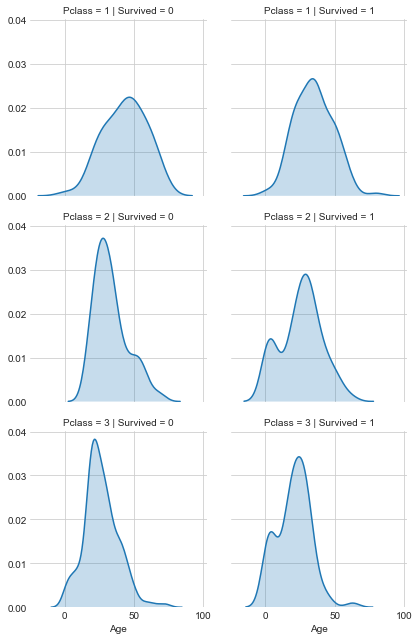

In [137]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

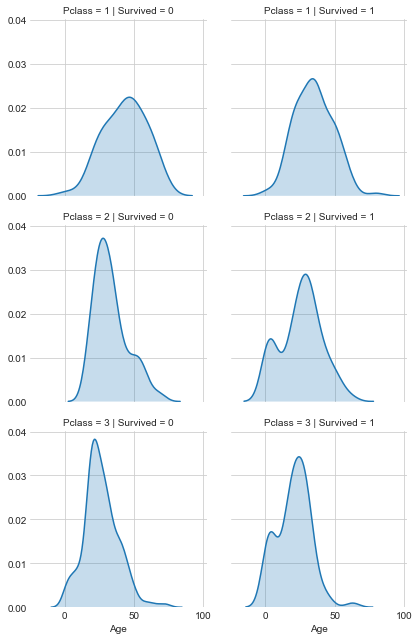

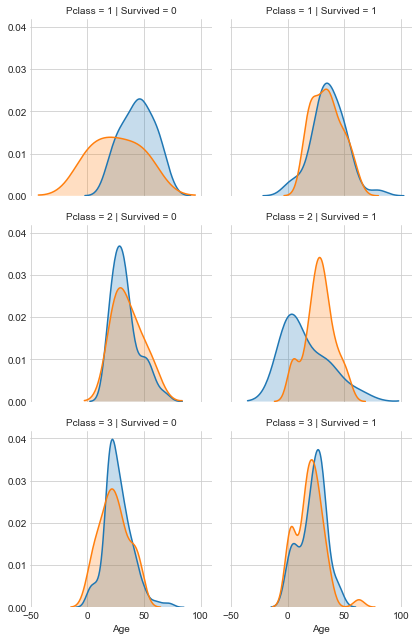

In [138]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", size=3)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

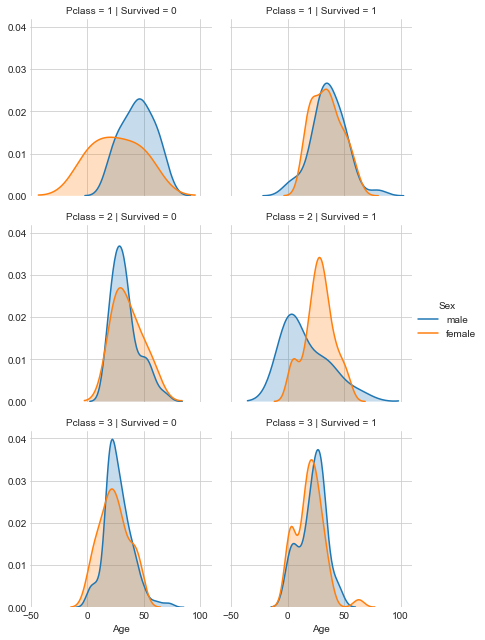

In [139]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", size=3)
g.map(sns.kdeplot, "Age", shade=True)
g.add_legend()
sns.despine(left=True, bottom=True)
plt.show()

### 可视化地理数据

In [140]:
import pandas as pd
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
routes  = pd.read_csv('routes.csv')

print(airports.iloc[0])
print(airlines.iloc[0])
print(routes.iloc[0])

id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object
id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object
airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object


In [141]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
# create a new plot with default tools, using figure
p = figure(plot_width=400, plot_height=400)
# add a circle renderer with a size, color, and alpha
p.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=15, line_color="navy", fill_color="orange", fill_alpha=0.5)
output_notebook()
show(p) # show the results

Loading BokehJS ...

## 数据清理

In [143]:
import pandas as pd
data_files = [
    "School_Level.csv",
    "2006_-_2012_School_Demographics_and_Accountability_Snapshot.csv",
    "2010-2011_Class_Size_-_School-level_detail).csv",
    "2010__AP__College_Board__School_Level_Results .csv",
    "2014_-_2015_DOE_High_School_Directory.csv",
    "2012_SAT_Results.csv"
]
data = {}
for f in data_files:
    d = pd.read_csv(f)
    key_name = f.replace(".csv", "")
    data[key_name] = d

In [147]:
all_survey = pd.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pd.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pd.concat([all_survey, d75_survey], axis=0)
print(survey.head())

    Demographic     DBN                            School Name    Cohort  \
0  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2003   
1  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2004   
2  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2005   
3  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL      2006   
4  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL  2006 Aug   

   Total Cohort Total Grads - n Total Grads - % of cohort Total Regents - n  \
0             5               s                         s                 s   
1            55              37                     67.3%                17   
2            64              43                     67.2%                27   
3            78              43                     55.1%                36   
4            78              44                     56.4%                37   

  Total Regents - % of cohort Total Regents - % of grads  \
0       

### 数据清理演练

### 数据清理演练：组合数据

### 分析和可视化数据

## 方差分析

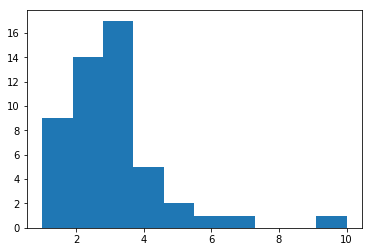

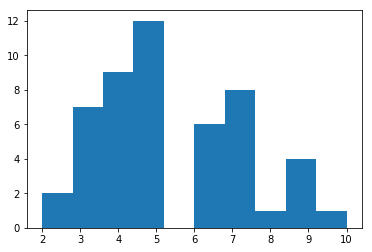

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
a=pd.read_csv("weight_loss.csv",header=None)
plt.hist(a[0])
plt.show()
plt.hist(a[1])
plt.show()

In [18]:
mean_difference = a[1].mean() -a[0].mean()
print(mean_difference)

2.52


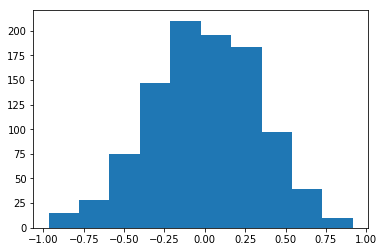

1000


In [38]:
mean_difference = 2.52
mean_differences = []
for i in range(1000):
    group_a = []
    group_b = []
    for value in a.values:
        assignment_chance = np.random.rand()
        if assignment_chance >= 0.5:
            group_a.append(value)
        else:
            group_b.append(value)
    iteration_mean_difference = np.mean(group_b) - np.mean(group_a)
    mean_differences.append(iteration_mean_difference)
    
plt.hist(mean_differences)
plt.show()
print(len(mean_differences))

In [39]:
sampling_distribution = {}
for df in mean_differences:
    if sampling_distribution.get(df, False):
        sampling_distribution[df] = sampling_distribution[df] + 1
    else:
        sampling_distribution[df] = 1
sampling_distribution

{-0.96794871794871762: 1,
 -0.93208828522920228: 1,
 -0.92939244663382548: 1,
 -0.92788461538461542: 1,
 -0.91396103896103842: 1,
 -0.90833333333333321: 1,
 -0.90374331550802145: 1,
 -0.87999999999999945: 1,
 -0.83999999999999986: 1,
 -0.83579638752052565: 3,
 -0.83279220779220742: 1,
 -0.81803542673107854: 1,
 -0.79227053140096659: 1,
 -0.76762820512820529: 1,
 -0.75999999999999979: 1,
 -0.75480769230769251: 1,
 -0.74305555555555536: 1,
 -0.7275641025641022: 1,
 -0.71264367816091978: 1,
 -0.71175523349436398: 1,
 -0.70053475935828891: 1,
 -0.70000000000000018: 1,
 -0.6875: 2,
 -0.66883116883116855: 1,
 -0.65700483091787465: 1,
 -0.6420361247947457: 1,
 -0.63636363636363624: 1,
 -0.63461538461538503: 2,
 -0.63333333333333286: 1,
 -0.63123993558776137: 2,
 -0.62987012987012969: 1,
 -0.6167471819645729: 1,
 -0.60737179487179471: 2,
 -0.60098522167487722: 1,
 -0.59592529711375208: 1,
 -0.59252971137521238: 1,
 -0.59166666666666634: 1,
 -0.59098228663446095: 2,
 -0.58949096880131346: 1,
 -

In [41]:
frequencies = []
for sp in sampling_distribution.keys():
    if sp >= 2.52:
        frequencies.append(sampling_distribution[sp])
p_value = np.sum(frequencies) / 1000
p_value

0.0

In [49]:
import pandas as pd
from scipy import stats
df=a
d1 = df[0]
d2 = df[1]
args = [d1,d2]
f,p = stats.f_oneway(*args)
f,p

-0.04999999962278423

In [60]:
import pandas as pd
from scipy import stats
d1 = [63,47,54,40]
d2 = [82,72,88,66]
d3 = [69,54,61,48]
args = [d1,d3]
f,p = stats.f_oneway(*args)
f,p

(1.0970149253731345, 0.33526917332111739)

## 卡方检验

In [55]:
from scipy import stats
obs = [30, 14, 34, 45, 57, 20]
exp = [20, 20, 30, 40, 60, 30]#期望
stats.chisquare(obs, f_exp = exp)

Power_divergenceResult(statistic=11.441666666666666, pvalue=0.043293130315804972)

## 机器学习

### 邻近算法

In [12]:
from sklearn import neighbors
from sklearn import datasets

In [16]:
knn=neighbors.KNeighborsClassifier()#分类器
iris=datasets.load_iris()
knn.fit(iris.data,iris.target)
predictd=knn.predict([[0.1,0.2,0.3,0.4]])
predictd

array([0])

In [6]:
import pandas as pd
dc_listings = pd.read_csv('dc_airbnb.csv')
print(dc_listings.iloc[0])

host_response_rate                  92%
host_acceptance_rate                91%
host_listings_count                  26
accommodates                          4
room_type               Entire home/apt
bedrooms                              1
bathrooms                             1
beds                                  2
price                           $160.00
cleaning_fee                    $115.00
security_deposit                $100.00
minimum_nights                        1
maximum_nights                     1125
number_of_reviews                     0
latitude                          38.89
longitude                      -77.0028
city                         Washington
zipcode                           20003
state                                DC
Name: 0, dtype: object


In [8]:
import numpy as np 
new_listing = 3
dc_listings['distance'] = dc_listings['accommodates'].apply(lambda x: np.abs(x - new_listing))
dc_listings['distance'].value_counts()

1     2294
2      503
0      461
3      279
5       73
4       35
7       22
6       17
9       12
13       8
8        7
12       6
11       4
10       2
Name: distance, dtype: int64

In [9]:
import numpy as np
np.random.seed(1)
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
dc_listings = dc_listings.sort_values('distance')
print(dc_listings.iloc[0:10]['price'])

577     $185.00
2166    $180.00
3631    $175.00
71      $128.00
1011    $115.00
380     $219.00
943     $125.00
3107    $250.00
1499     $94.00
625     $150.00
Name: price, dtype: object


In [10]:
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
mean_price = dc_listings.iloc[0:5]['price'].mean()
print(mean_price)

156.6
